# Classificação de Câncer de Mama


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Aquisição e pré processamento de dados

O conjunto de dados escolhido para classificação foi o de [Câncer de Mama](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) do Kaggle, que foi construído coletando informações do núcleo celular através da punção aspirativa por agulha fina do tecido mamário, como medida de raio, textura, perímetro, concavidade, entre outros. Desse modo, o objetivo é classificar se um tumor é **Maligno** ou **Benigno** dadas essas medidas. Ao todo, são considerados 10 atributos e para cada um deles há o valor da média geral, erro padrão e a média dos três maiores valores medidos para cada um deles, totalizando 30 colunas de valores a serem considerados.

In [2]:
#Carregando dataset 

cancer = pd.read_csv('breast-cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Removendo coluna id, que não é importante e transformando a variável categórica ''diagnóstico'' em númerico. Sendo B (benigno) = 0 e M (maligno) = 1. Esse conjunto de dados não tem campos nulos, portanto essa etapa não será feita.

In [3]:
cancer = cancer.drop(columns=['id'])
cancer['diagnosis'] = cancer['diagnosis'].replace(['B','M'], [0,1])

cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

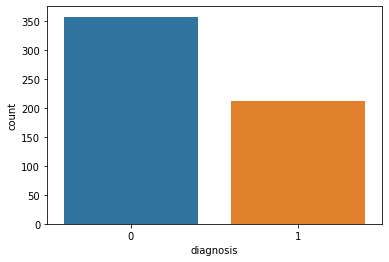

In [4]:
sns.countplot(x=cancer['diagnosis'])

A princípio, serão considerados apenas as 10 colunas referentes à média dos atributos (que possuem o sufixo ''_mean'') para realizar a classificação. 

Vamos z-normalizar os dados

In [5]:
cancer.iloc[:,1:] = (cancer.iloc[:,1:] - cancer.iloc[:,1:].mean())/cancer.iloc[:,1:].std(ddof=1)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


Visualizando os 10 primeiros atributos

In [6]:
#sns.pairplot(cancer.iloc[:,:11], hue="diagnosis")

## Construindo Árvores de Classificação

In [7]:
def plot_tree_decision_regions(X, y, criterion="gini", max_depth=None, min_samples_leaf=1, data=cancer):
    
    plt.figure(figsize=(15,5))

    # Parameters
    plot_colors = "rb"
    plot_step = 0.02

    pairs_list = []
    for i in range(1, 4):
        for j in range(i+1, 4):
            pairs_list.append([i,j])

    for pairidx, pair in enumerate(pairs_list):

        X = data.iloc[:, pair].to_numpy()
        y = data.iloc[:, 0].to_numpy()

        # Train
        clf = tree.DecisionTreeClassifier(criterion=criterion, 
                                          max_depth=max_depth, 
                                          min_samples_leaf=min_samples_leaf).fit(X, y)

        # Plot the decision boundary
        plt.subplot(1, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

        plt.xlabel(data.columns[pair[0]])
        plt.ylabel(data.columns[pair[1]])

        # Plot the training points    
        for l, c in zip(np.unique(y), plot_colors):
            plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

X: atributos

y: label a ser previsto

In [8]:
X, y = cancer.iloc[:,1:].values, cancer.iloc[:,0].values

In [9]:
clf = tree.DecisionTreeClassifier()
X_tree_scikit = clf.fit(X, y)

clf.get_depth()

7

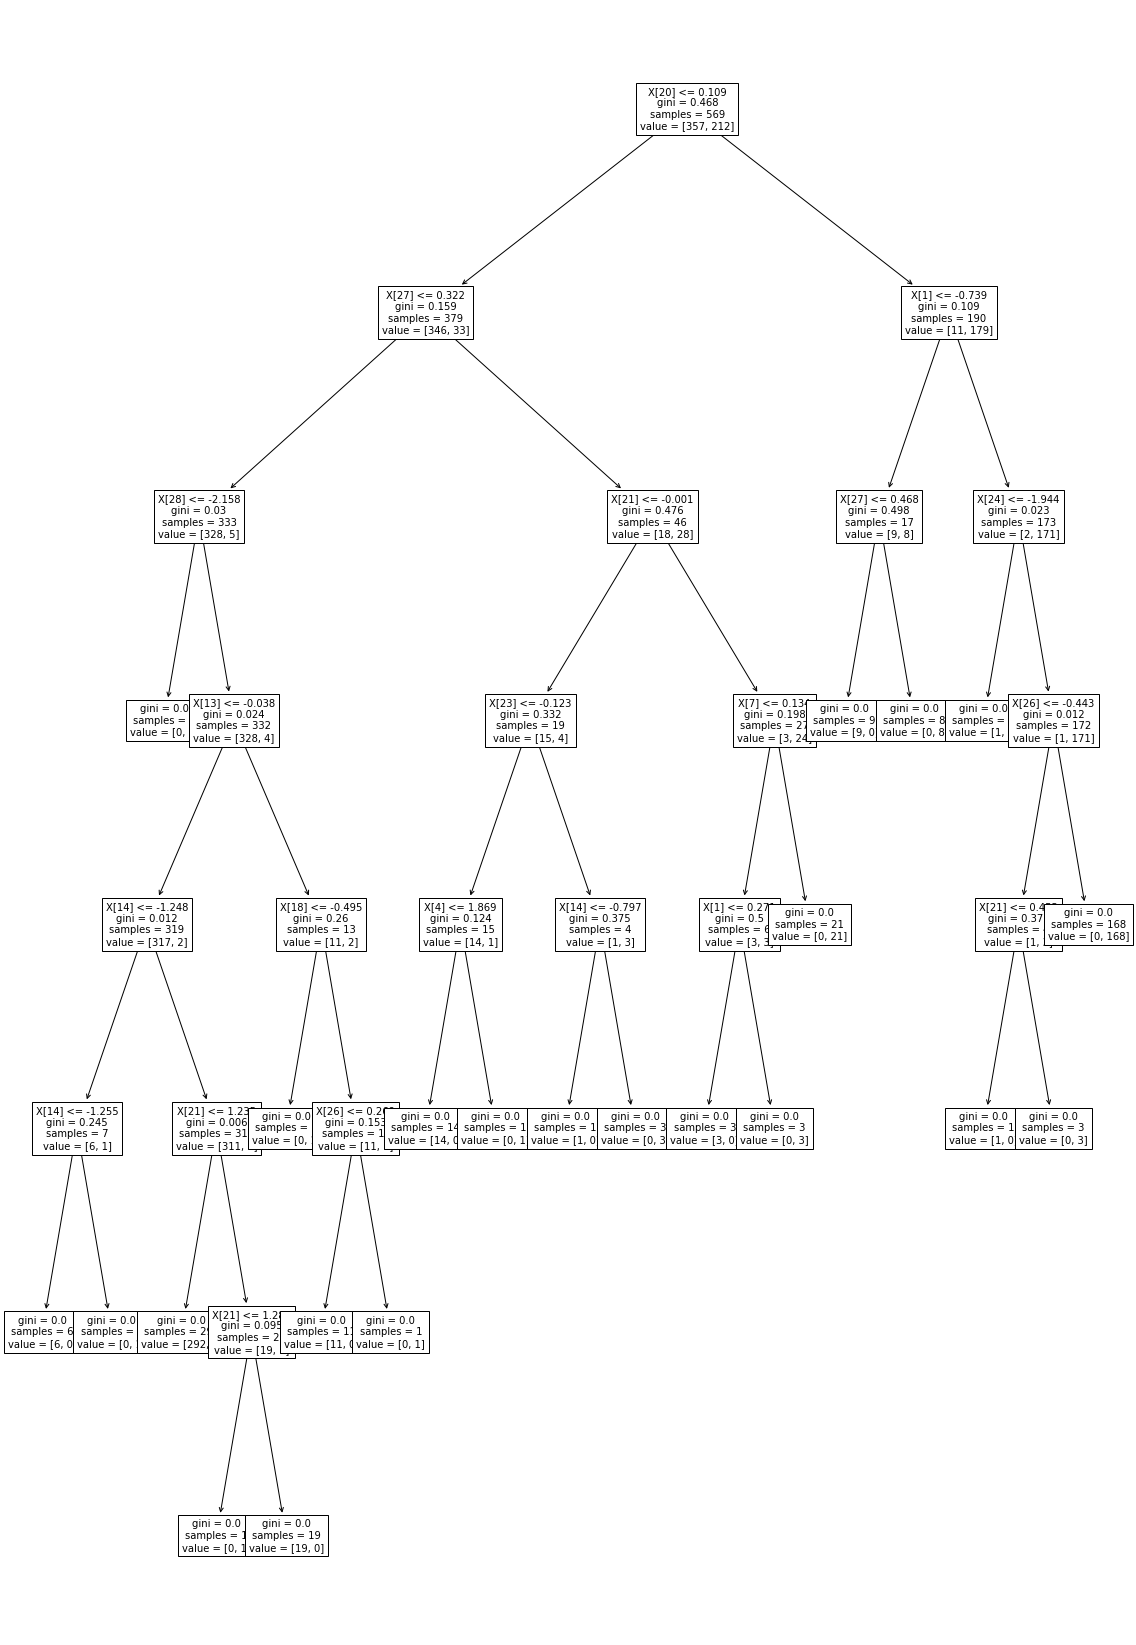

In [10]:
plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


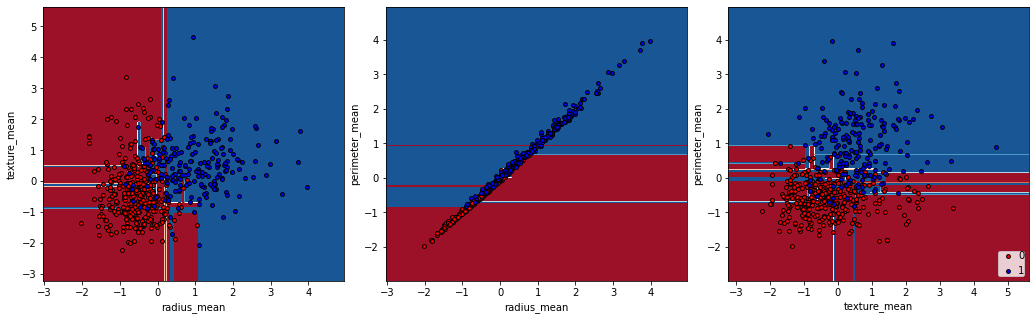

In [11]:
plot_tree_decision_regions(X, y)

**Qualidade da divisão**

Utilizando entropia para medir a qualidade da divisão (na execução anterior foi utilizado o Gini).

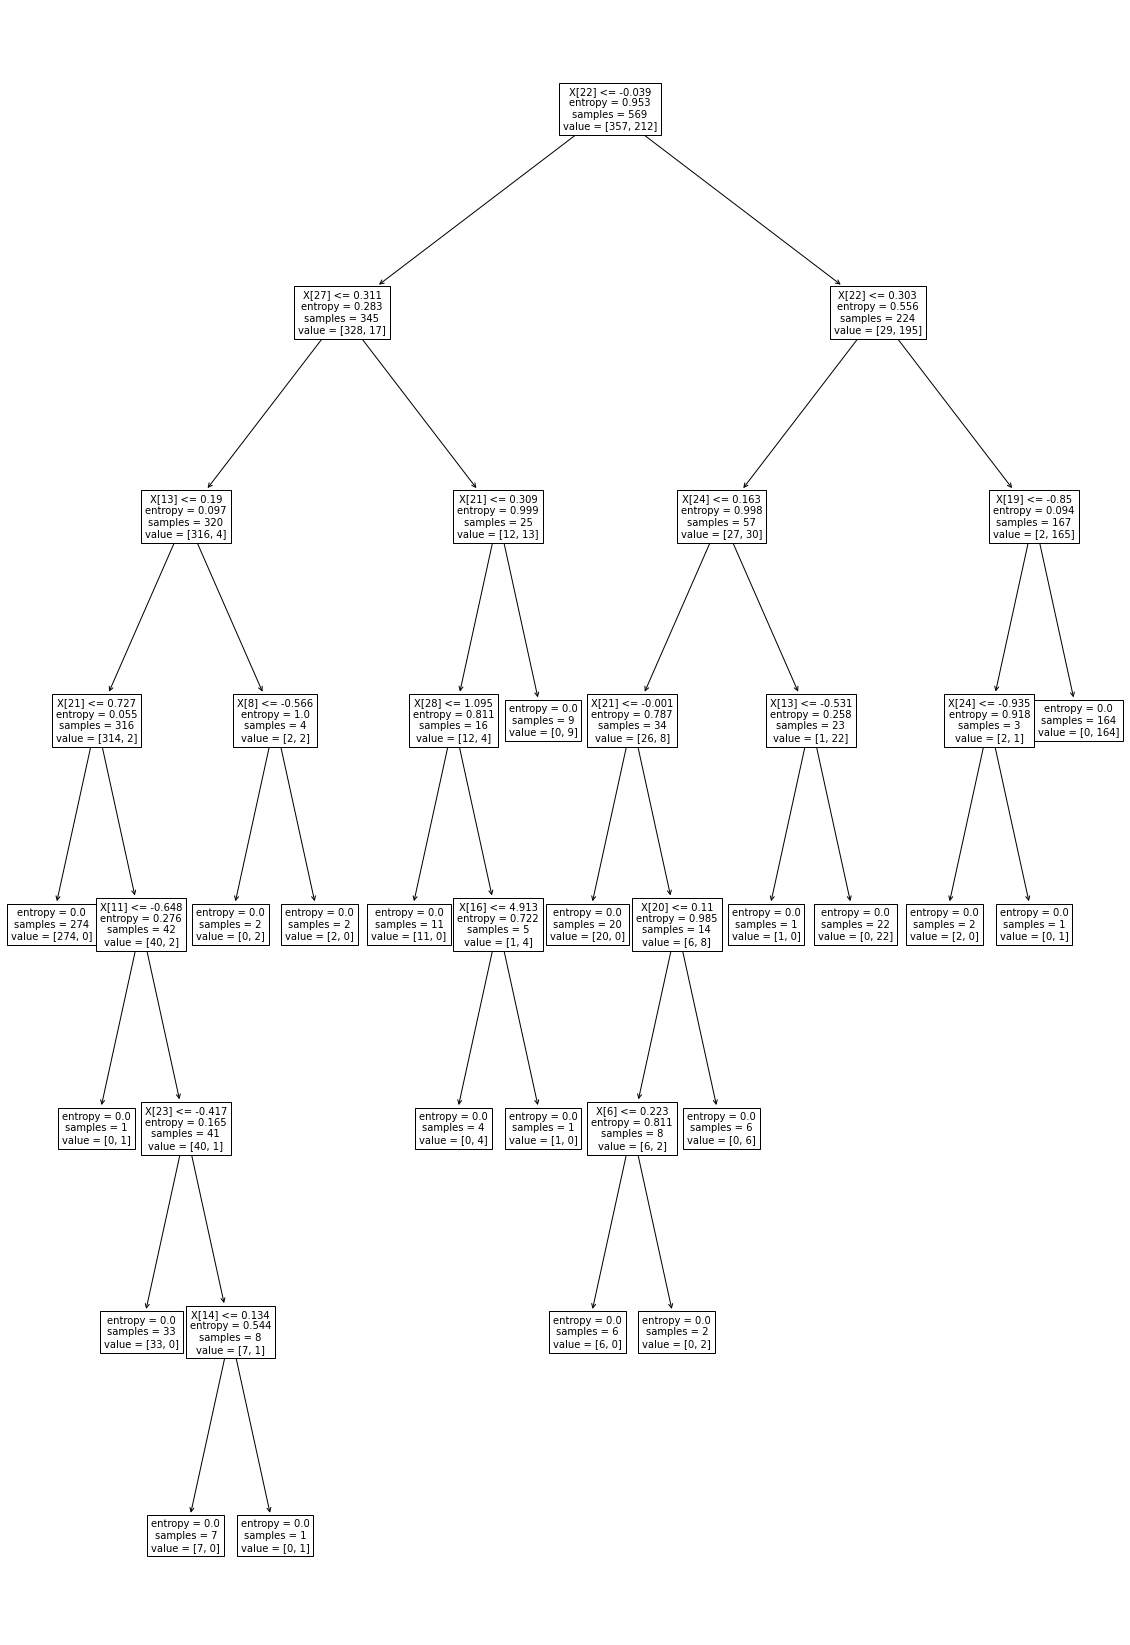

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
X_tree_scikit = clf.fit(X, y)

plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


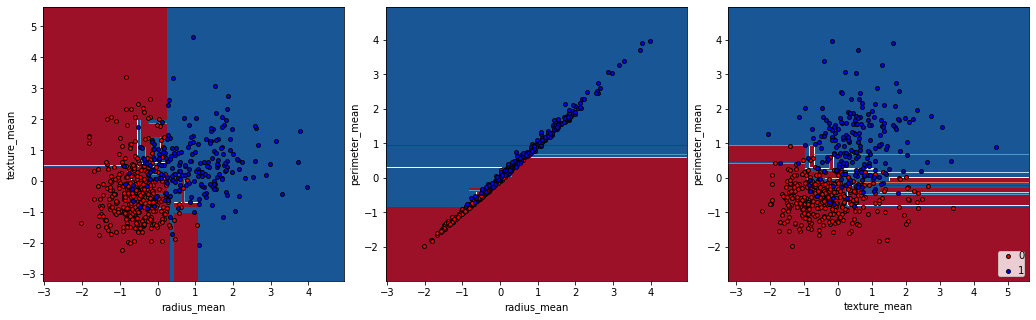

In [13]:
plot_tree_decision_regions(X, y, criterion="entropy")

**Reduzindo overfitting**

Variando hiperparâmetros para reduzir o sobreajuste.

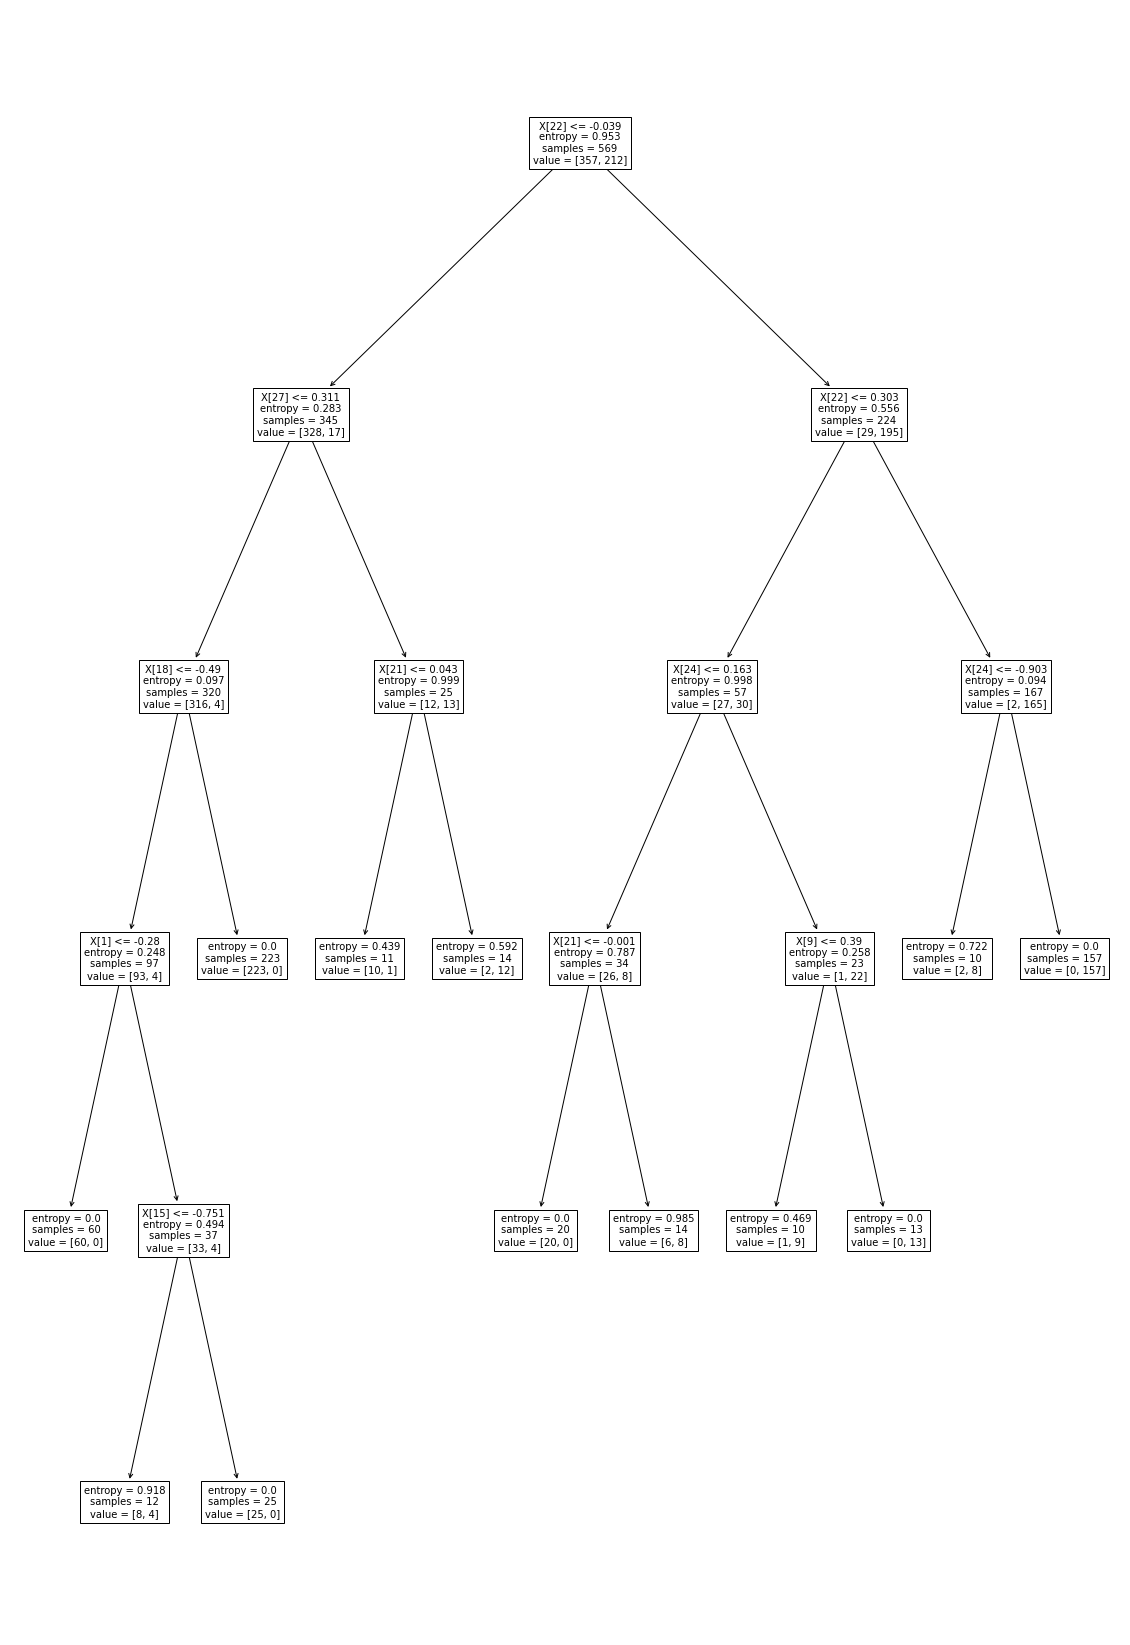

In [14]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10)
X_tree_scikit = clf.fit(X, y)

plt.figure(figsize=(20,30))
tree.plot_tree(clf, fontsize=10) 
plt.show()

C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
C:\Users\Jackson\AppData\Local\Temp\ipykernel_39960\233522209.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == l, 0], X[y == l, 1], c=c, label=l, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


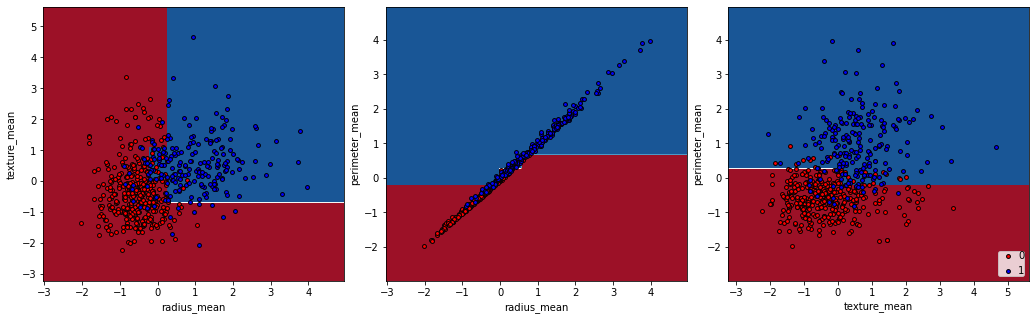

In [15]:
plot_tree_decision_regions(X, y, criterion="entropy", max_depth=5, min_samples_leaf=10)

**Separando conjuntos de treino e teste**

In [16]:
# 30% de teste e 70% para treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [17]:
clf = tree.DecisionTreeClassifier()
X_train_tree_scikit = clf.fit(X_train, y_train)

In [18]:
clf.score(X_test, y_test)

0.9005847953216374

O modelo obteve um percentual de acertos de 89,5%

In [19]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Acurácia: ' + str(accuracy_score(y_test, y_pred)))

[[94 13]
 [ 4 60]]
Acurácia: 0.9005847953216374


In [20]:
plt.figure(figsize=(20,30))
#tree.plot_tree(clf, fontsize=10) 
#plt.show()

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

#### Verificando impacto da alteração dos hiperparâmetros na acurácia do classificador.

Nesse caso, a acurácia foi aumentada para 93%

In [21]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)
X_train_tree_scikit = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9298245614035088

In [22]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[102   5]
 [  7  57]]
Accuracy: 0.9298245614035088


In [23]:
plt.figure(figsize=(20,30))
#tree.plot_tree(clf, fontsize=10) 
#plt.show()

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

#### Removendo o atributo mais significativo: X[7]

In [24]:
X_new = np.delete(X, 7, axis=1)

In [25]:
clf_new = tree.DecisionTreeClassifier()
X_new_tree_scikit = clf_new.fit(X_new, y)

#plt.figure(figsize=(20,30))
#tree.plot_tree(clf_new, fontsize=10) 
#plt.show()